In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df=pd.read_csv(r"D:\\Machine-Learning-Practice\\My-Learning-Projects\\train.csv")

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

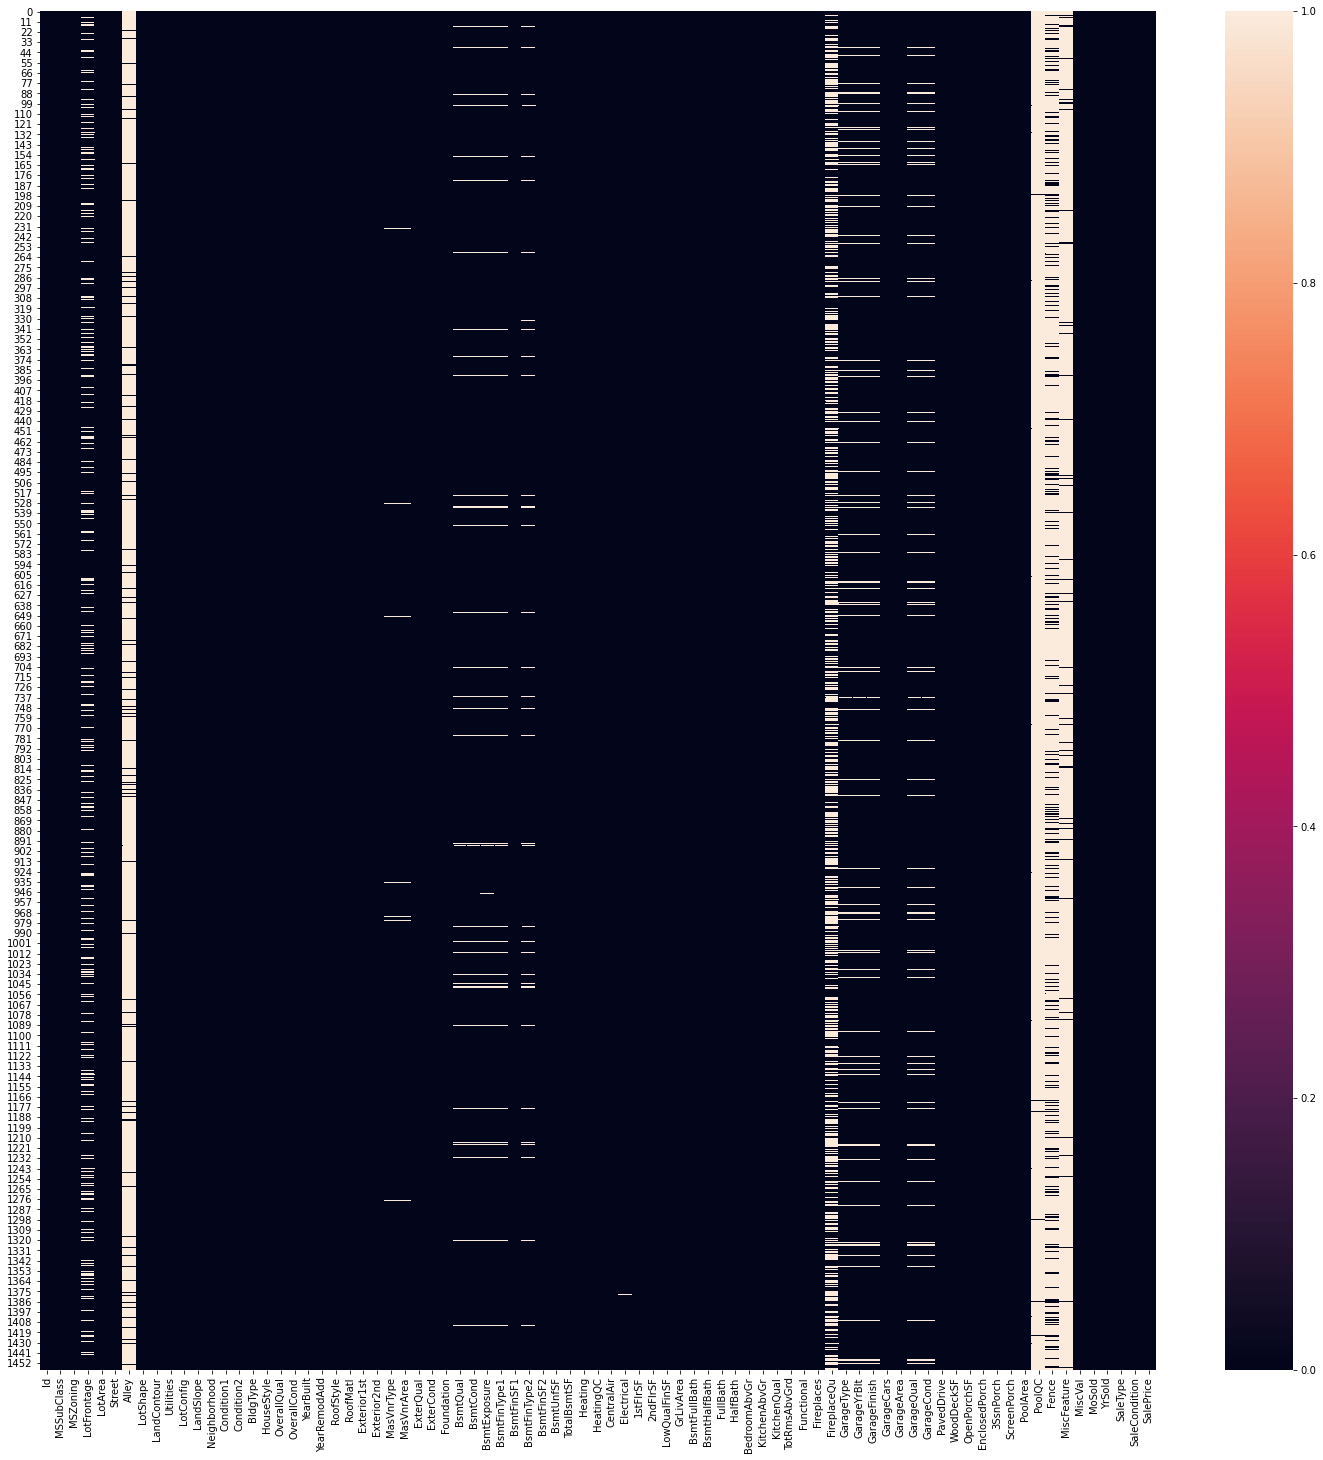

In [6]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [7]:
null_var=df.isnull().sum()/df.shape[0]*100
null_var

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [8]:
drop_columns=null_var[null_var>17].keys()
drop_columns

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
df2_drop_clm=df.drop(columns=drop_columns)

In [10]:
df2_drop_clm.shape

(1460, 75)

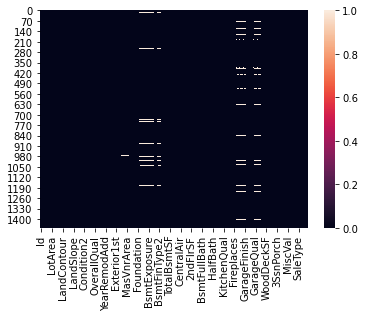

In [11]:
sns.heatmap(df2_drop_clm.isnull())

In [12]:
df3_drop_rows=df2_drop_clm.dropna()

In [13]:
df3_drop_rows.shape

(1338, 75)

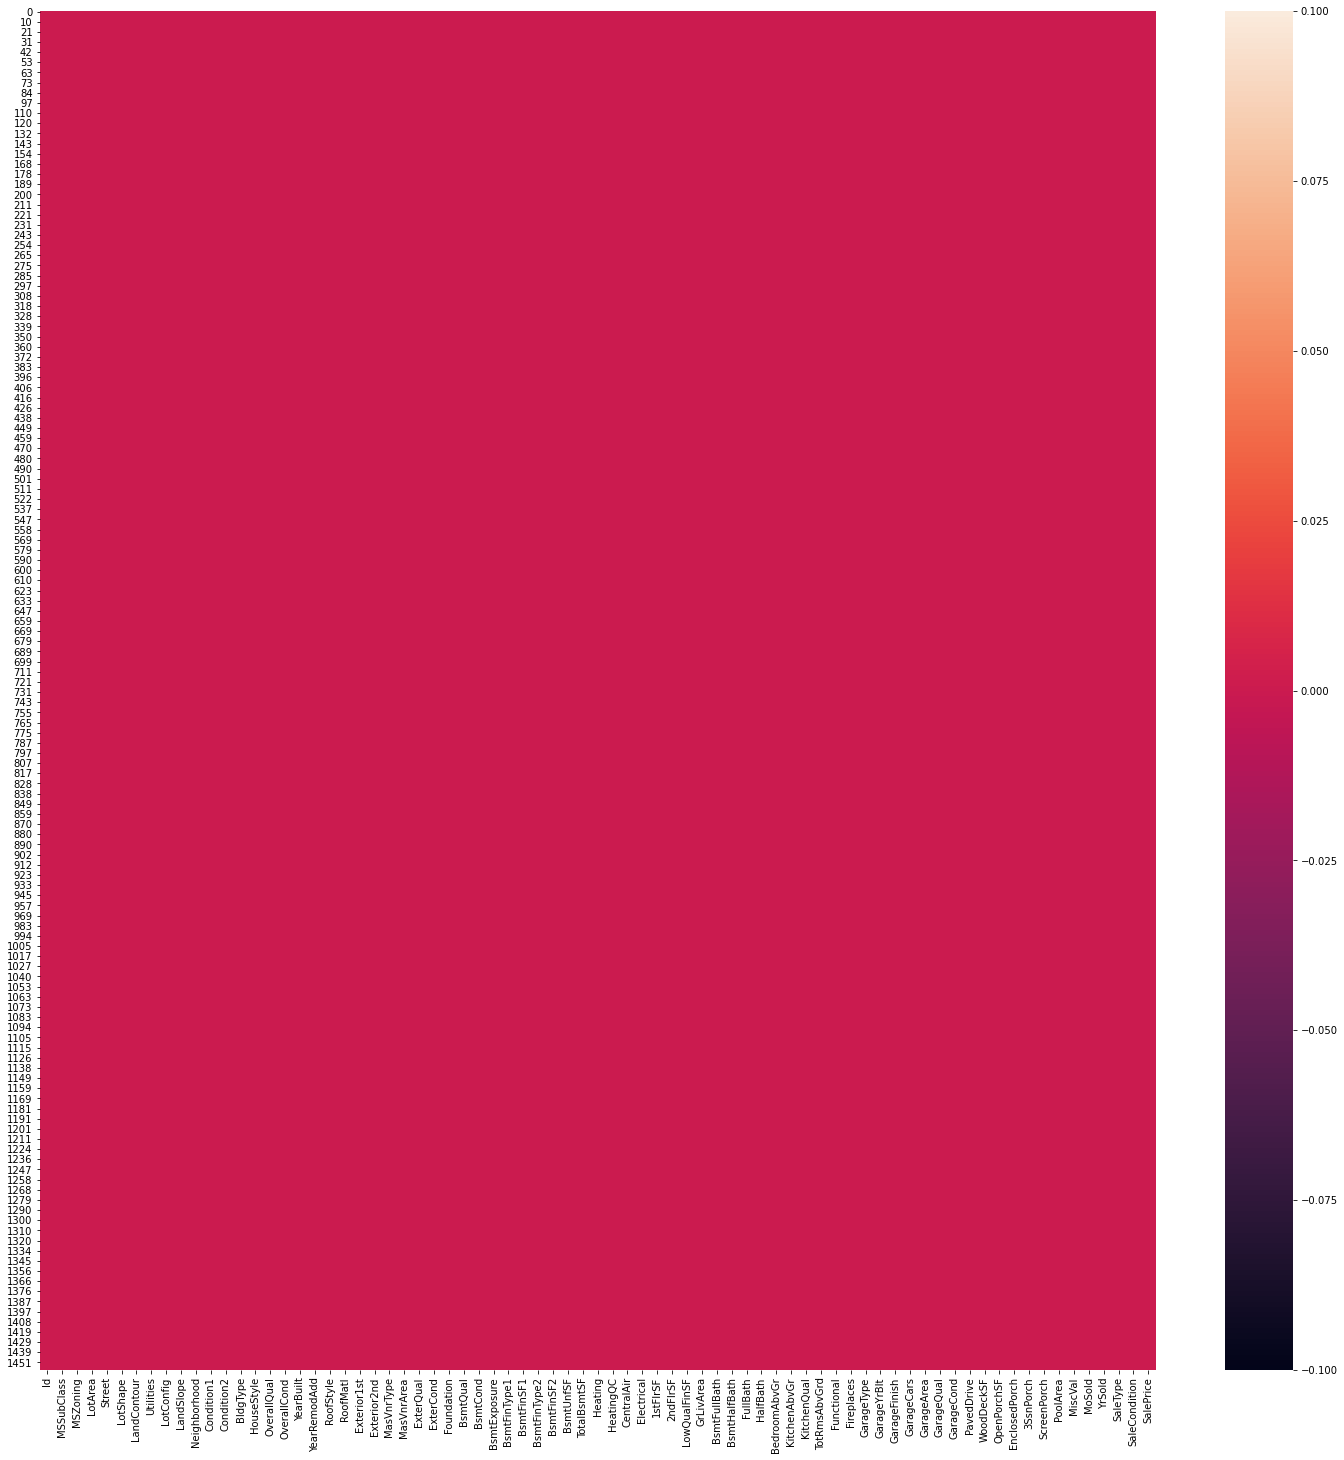

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [15]:
df3_drop_rows.isnull().sum().sum()

0

In [16]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

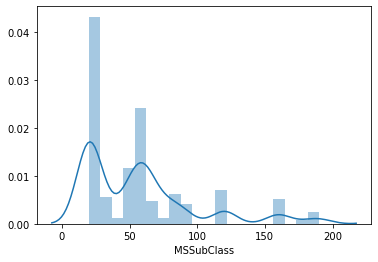

In [17]:
sns.distplot(df['MSSubClass'])

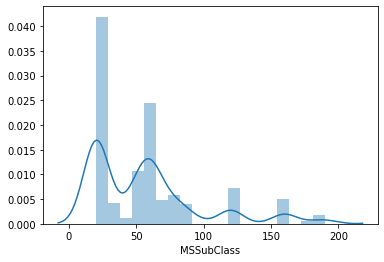

In [18]:
sns.distplot(df3_drop_rows['MSSubClass'])

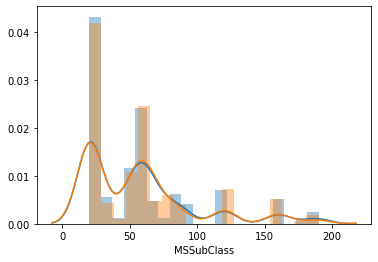

In [19]:
sns.distplot(df['MSSubClass'])
sns.distplot(df3_drop_rows['MSSubClass'])

In [20]:
num_var=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

C:\Users\iMrAn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\iMrAn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\iMrAn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\iMrAn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\iMrAn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\iMrAn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

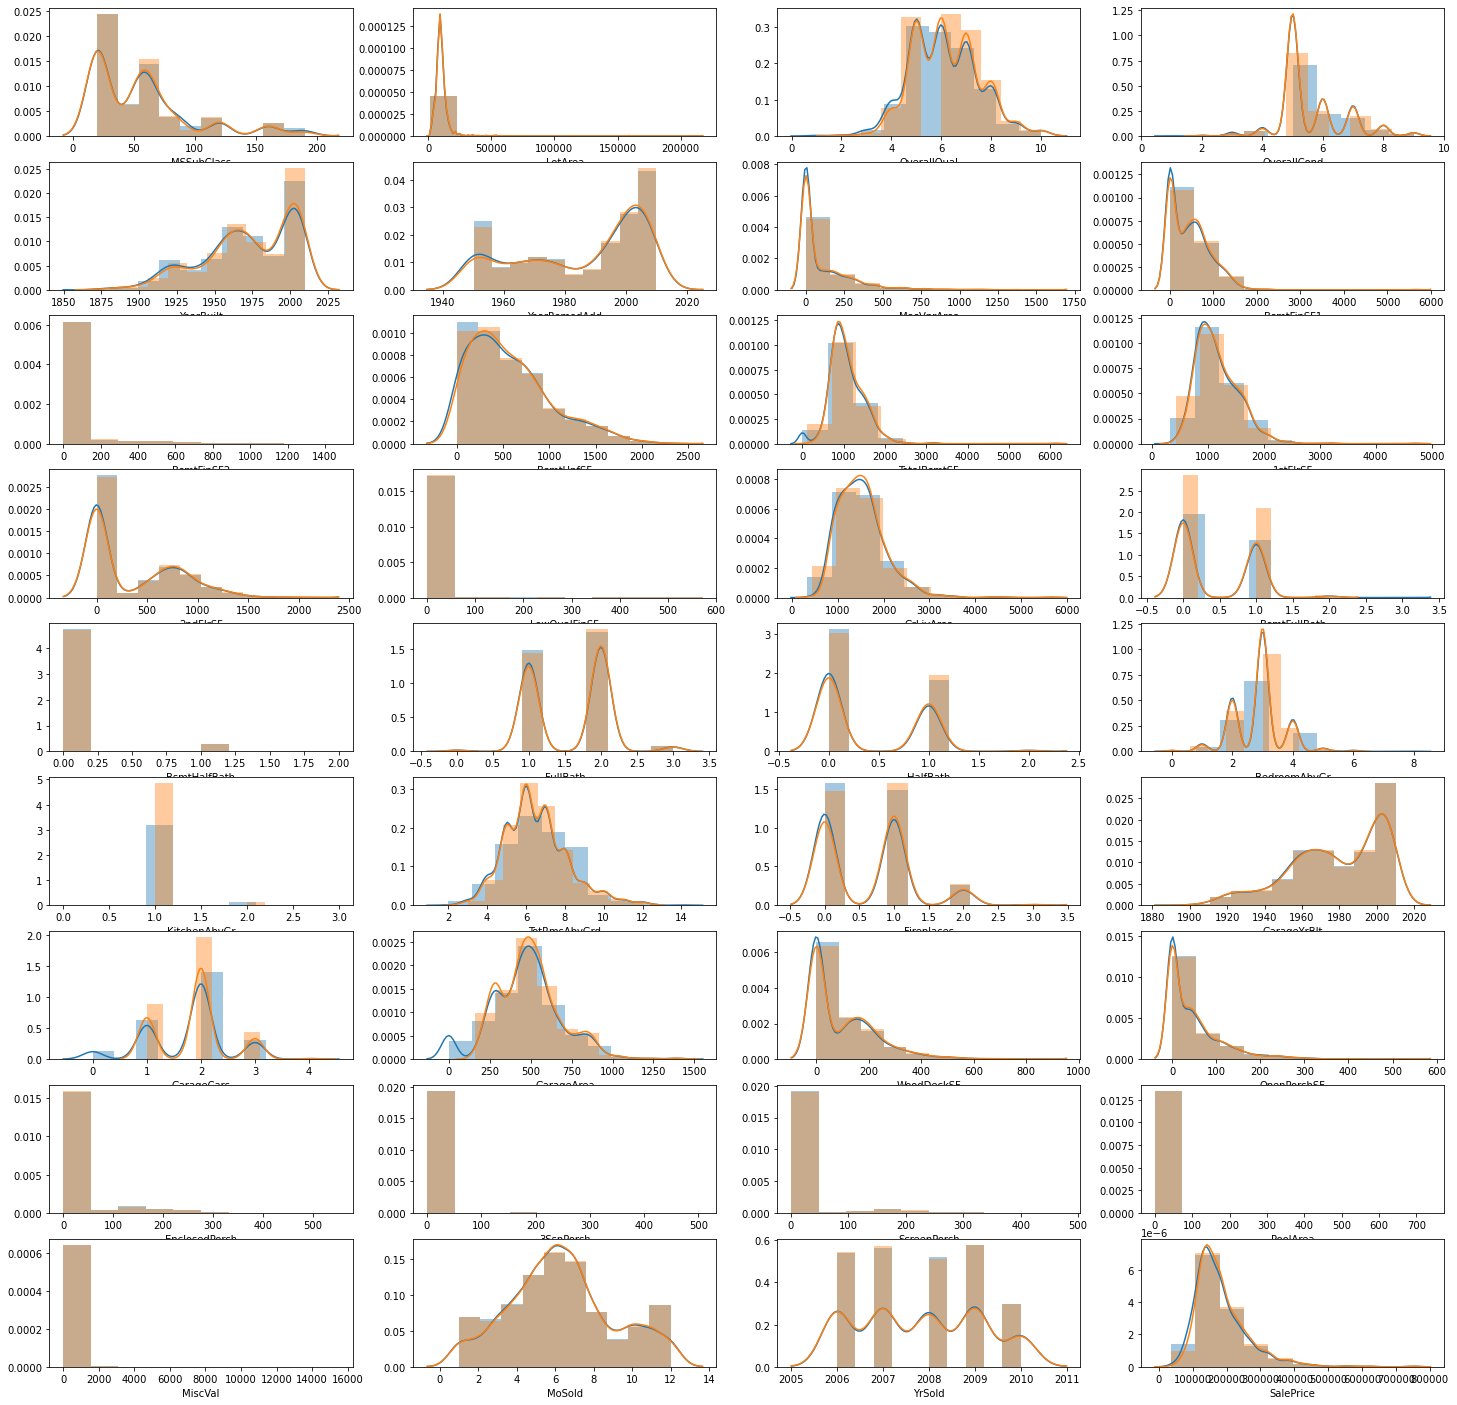

In [21]:
plt.figure(figsize=(25,25))
for i,var in enumerate(num_var):
    plt.subplot(9,4,i+1)
    sns.distplot(df[var], bins=10)
    sns.distplot(df3_drop_rows[var], bins=10)
    

In [22]:
df3_drop_rows.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
df['MSZoning'].value_counts()/df3_drop_rows.shape[0]*100,
df3_drop_rows['MSZoning'].value_counts()/df3_drop_rows.shape[0]*100

RL         79.671151
RM         14.275037
FV          4.633782
RH          0.822123
C (all)     0.597907
Name: MSZoning, dtype: float64

In [24]:
pd.concat([df['MSZoning'].value_counts()/df.shape[0]*100,
           df3_drop_rows['MSZoning'].value_counts()/df3_drop_rows.shape[0]*100], axis=1, keys=['MSZoning_org', 'MSZoning_clean'])

,MSZoning_org,MSZoning_clean
RL,78.835616,79.671151
RM,14.931507,14.275037
FV,4.452055,4.633782
RH,1.095890,0.822123
C (all),0.684932,0.597907


In [25]:
def cat_var_dist(var):
   return pd.concat([df['MSZoning'].value_counts()/df.shape[0]*100,
          df3_drop_rows['MSZoning'].value_counts()/df3_drop_rows.shape[0]*100],
          axis=1, keys=[var+'_org', var+'clean'])

In [26]:
cat_var_dist('MSZoning')

,MSZoning_org,MSZoningclean
RL,78.835616,79.671151
RM,14.931507,14.275037
FV,4.452055,4.633782
RH,1.095890,0.822123
C (all),0.684932,0.597907


In [27]:
df_index_value=df3_drop_rows.select_dtypes(include=['object']).columns

In [65]:
def cat_var_dist1(var):
   return pd.concat([df[var].value_counts()/df.shape[0]*100,
          df3_drop_rows[var].value_counts()/df3_drop_rows.shape[0]*100],
          axis=1, keys=[var+'_org', var+'_clean'])




for var in (df_index_value):
     print()
     print(cat_var_dist1(var))
   


         MSZoning_org  MSZoning_clean
RL          78.835616       79.671151
RM          14.931507       14.275037
FV           4.452055        4.633782
RH           1.095890        0.822123
C (all)      0.684932        0.597907

      Street_org  Street_clean
Pave   99.589041     99.626308
Grvl    0.410959      0.373692

     LotShape_org  LotShape_clean
Reg     63.356164       61.958146
IR1     33.150685       34.304933
IR2      2.808219        2.989537
IR3      0.684932        0.747384

     LandContour_org  LandContour_clean
Lvl        89.794521          90.134529
Bnk         4.315068           3.886398
HLS         3.424658           3.587444
Low         2.465753           2.391629

        Utilities_org  Utilities_clean
AllPub      99.931507        99.925262
NoSeWa       0.068493         0.074738

         LotConfig_org  LotConfig_clean
Inside       72.054795        71.524664
Corner       18.013699        18.236173
CulDSac       6.438356         6.726457
FR2           3.219178    

Po       0.068493         0.074738

   CentralAir_org  CentralAir_clean
Y       93.493151         95.440957
N        6.506849          4.559043

       Electrical_org  Electrical_clean
SBrkr       91.369863         92.825112
FuseA        6.438356          5.680120
FuseF        1.849315          1.270553
FuseP        0.205479          0.149477
Mix          0.068493          0.074738

    KitchenQual_org  KitchenQual_clean
TA        50.342466          48.579970
Gd        40.136986          42.451420
Ex         6.849315           7.249626
Fa         2.671233           1.718984

      Functional_org  Functional_clean
Typ        93.150685         93.721973
Min2        2.328767          2.242152
Min1        2.123288          2.092676
Mod         1.027397          0.822123
Maj1        0.958904          0.747384
Maj2        0.342466          0.298954
Sev         0.068493          0.074738

         GarageType_org  GarageType_clean
Attchd        59.589041         63.677130
Detchd        26.5068

In [67]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
